# Comparison of spectrum between eNATL60 outputs and Altika Satellite for Region 1 and ASO months

Requisites :
 - notebook process-spectrum-comparison-eNATL60-region1-Altkia-ASO has successfully run and produced all the necessary result_*.nc in results_Altika-eNATL60-Region1-ASO
 - gonzag_cloud
 - climporn
 


In [1]:
import sys,os
from os import getenv
import warnings
warnings.filterwarnings("ignore")

In [2]:
GONZAG_DIR = '/Users/aureliealbert/Work/git/gonzag_cloud' ; 
sys.path.append(GONZAG_DIR)
import gonzag as gz


In [3]:
import xarray as xr
import sys
import glob
import numpy as nmp
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.mpl.ticker as cticker

%matplotlib inline


### Params

For the model

In [4]:
model = 'eNATL60'
region = '1'
season = 'fma'
name_mod = model+'-Region'+region+'-'+season
name_ssh_mod = 'sossheig_bl'


For altimetry data

In [5]:
name_sat= 'Altika'
name_ssh_sat='sla_unfiltered'


### Data

In [6]:
fresults='../results/results_'+name_sat+'-'+name_mod+'/result_00.nc'
dsn=xr.open_dataset(fresults)
fresults2='../results/results_Altika-eNATL60-Region1-fma/result_gonzag_netcdf_nocloud_track0.nc'
dsn2=xr.open_dataset(fresults2)

In [7]:
#clean up some remaining Nans

ds=dsn.where(nmp.isnan(dsn[name_ssh_sat])==0, drop=True)
ds2=dsn2.where(nmp.isnan(dsn2[name_ssh_sat])==0, drop=True)

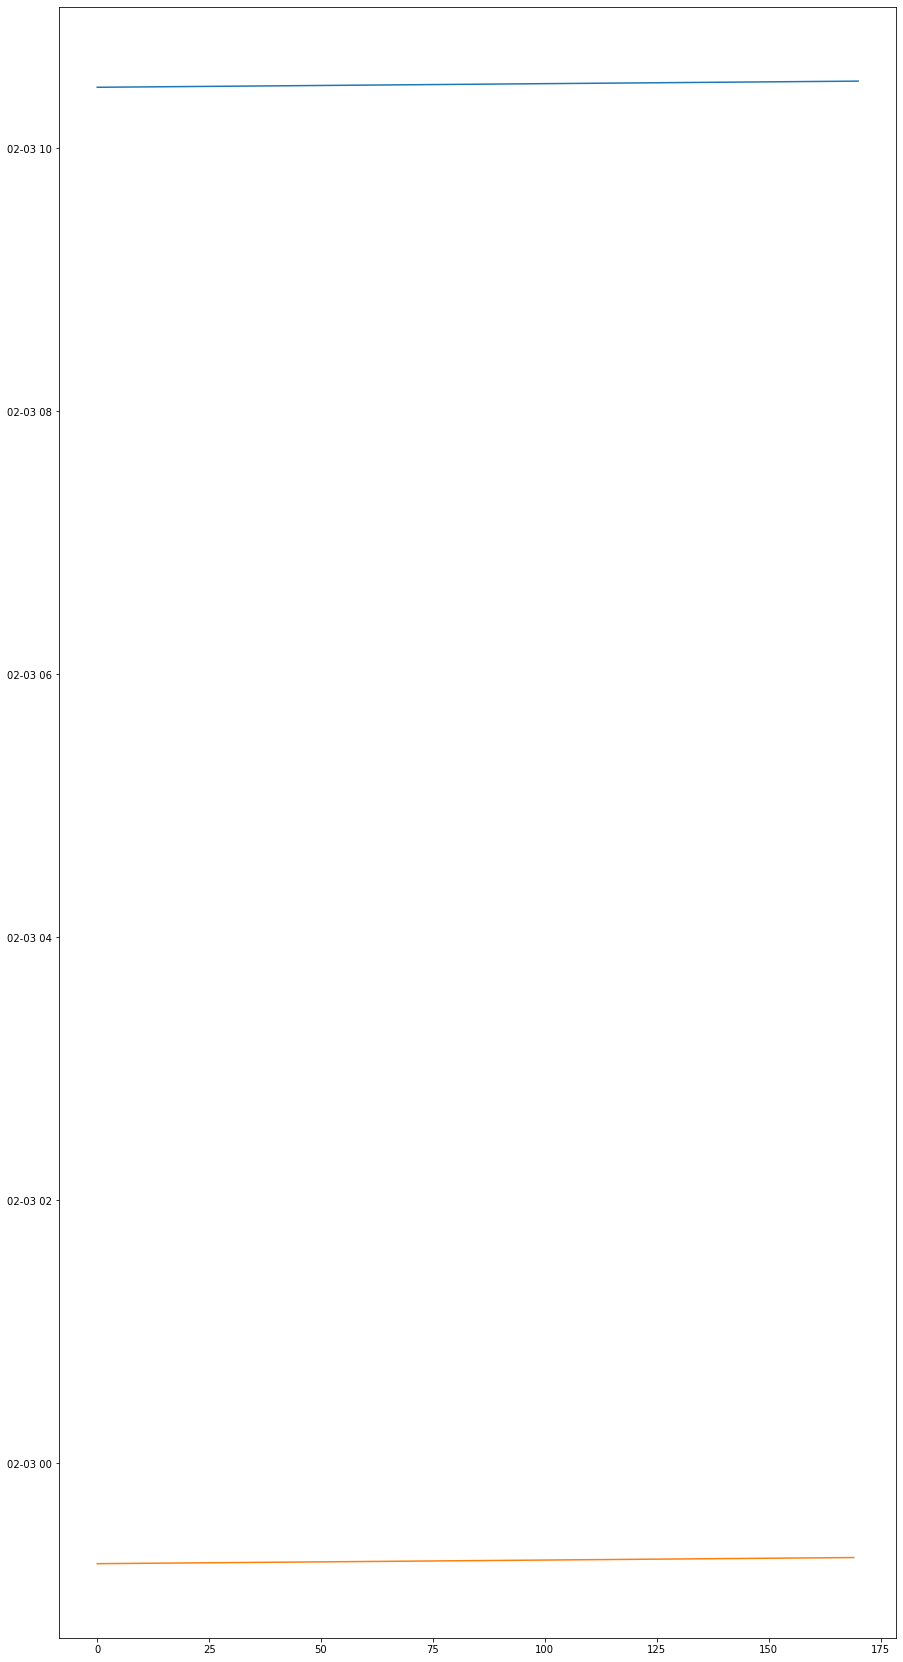

In [8]:
fig = plt.figure(num = 1, figsize=(15,30), facecolor='w', edgecolor='k')
ax = plt.subplot(111)
plt.plot(ds.time_counter)
plt.plot(ds2.time)
plt.savefig('../plots/SSH_'+name_sat+'-'+name_mod+'_cloud-netcdf_track0_time.png')
del fig,ax